In [87]:
%display latex

In [141]:
var('t')
y=function('y')(t)
omega=2*pi*1;Q=1;f=1;
eq=diff(y,t,2)+omega*diff(y,t)/Q+omega^2*y==omega^2*cos(2*pi*f*t);eq

4*pi^2*y(t) + 2*pi*diff(y(t), t) + diff(y(t), t, t) == 4*pi^2*cos(2*pi*t)

In [142]:
%display latex
var('t')
y=function('y')(t)
omega=2*pi;Q=1;f=1;
qu=diff(y,t,2)\
+omega*diff(y,t)/Q\
+omega^2*y==omega^2*cos(2*pi*f*t);qu

4*pi^2*y(t) + 2*pi*diff(y(t), t) + diff(y(t), t, t) == 4*pi^2*cos(2*pi*t)

In [143]:
diff(y,t,2)+omega*diff(y,t)

2*pi*diff(y(t), t) + diff(y(t), t, t)

In [144]:
omega*diff(y,t)

2*pi*diff(y(t), t)

In [145]:
Q+omega^2*y

4*pi^2*y(t) + 1

In [146]:
%display latex
var('t k b ') 
x = function('x')(t) 
DE2 = diff(x,t,t) == -2*x - 1/2*diff(x,t) 
u2 = desolve(DE2, x, ivar=t)

In [147]:
var('R,R_w,I,U,U_t') 
U_t = U==I*(R+R_w)
show(U_t)

U == I*(R + R_w)

In [148]:
eq=solve(U_t,I);eq

[I == U/(R + R_w)]

In [149]:
P=R*I^2;P

I^2*R

In [150]:
P1=P.substitute(eq[0]);P1

R*U^2/(R + R_w)^2

In [151]:
P1.diff(R)==0 

U^2/(R + R_w)^2 - 2*R*U^2/(R + R_w)^3 == 0

In [152]:
solve(_, R) 

[R == R_w]

In [153]:
P1.diff(R, 2) 

-4*U^2/(R + R_w)^3 + 6*R*U^2/(R + R_w)^4

In [154]:
_.substitute(R==R_w)

-1/8*U^2/R_w^3

In [102]:
solve(_<0, R_w) 

[[0 < R_w, U != 0]]

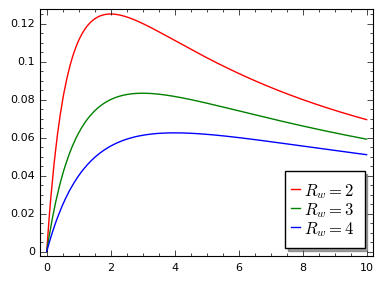

In [103]:
P2 = plot(P1.subs({U:1, R_w:2}),(R,0,10), color="red",legend_label=r'$R_w=2$')
P3 = plot(P1.subs({U:1, R_w:3}),(R,0,10), color="green", legend_label=r'$R_w=3$')
P4 = plot(P1.subs({U:1, R_w:4}),(R,0,10), color="blue", legend_label=r'$R_w=4$')
show(P2+P3+P4,figsize=4,frame=True,fontsize=8,axes=False)

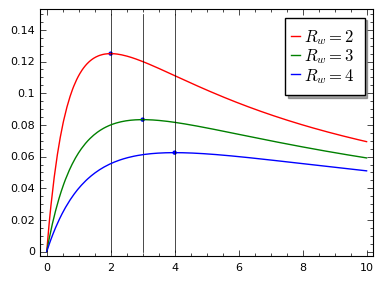

In [104]:
P2l = P2 +line([(2,0),(2,0.15)], color="black", thickness=0.5) +point((2, P1.subs({U:1, R_w:2, R:2}))) 
P3l = P3 +line([(3,0),(3,0.15)], color="black", thickness=0.5) +point((3, P1.subs({U:1, R_w:3, R:3}))) 
P4l = P4 +line([(4,0),(4,0.15)], color="black", thickness=0.5) +point((4, P1.subs({U:1, R_w:4, R:4}))) 
show(P2l+P3l+P4l,figsize=4,frame=True,fontsize=8,axes=False)

In [105]:
p3d = plot3d(P1.substitute({U:1}), (R,0.01,1), (R_w,0.1,1)) 
f(R)=P1.substitute({U:1,R_w:R}); show(f) 

R |--> 1/4/R

In [106]:
l=line3d( [ (R1,R1,f(R1)) for R1 in srange(.1,1,0.01)],thickness=10,color='red' ) 
l2=line3d( [ (R1,R1,0) for R1 in srange(.1,1,0.1)],thickness=2,color='gray' ) 
(p3d+l+l2).show(viewer='threejs')

Graphics3d Object

In [107]:
var('C, R_o,R, t, U_0, U_in, omega') 
U = function('U')(t) 
R_0= U.diff()+U/(R*C)==0;show(R_0)

U(t)/(C*R) + diff(U(t), t) == 0

In [108]:
sol = desolve(R_0, U, ivar=t, ics=[0, U_0]);sol

U_0*e^(-t/(C*R))

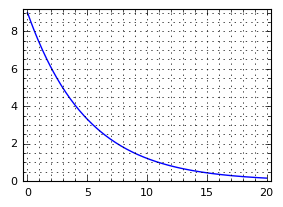

In [109]:
show(plot(sol.substitute({U_0:9, R:1, C:5}), 0, 20),
     figsize=3,frame=True,axes=False,gridlines="minor",
    fontsize=8) 

In [110]:
R_0= U.diff() + U/(R*C) == U_in/(R*C)
sol = desolve(R_0, U, ivar=t, ics=[0,U_0]);R_0,sol

(U(t)/(C*R) + diff(U(t), t) == U_in/(C*R),
 (U_in*e^(t/(C*R)) + U_0 - U_in)*e^(-t/(C*R)))

In [111]:
assume(C>0); assume(R>0)
limit(sol, t=oo) 

U_in

In [112]:
ex(t) = sol.substitute({C:6, R:1, U_in:9, U_0:0}) 
#show(ex)(t=5, U_in=9, U_0=0, R=1)

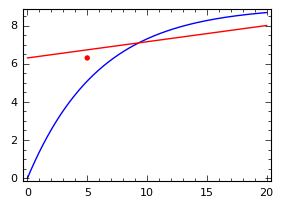

In [113]:
show(plot(ex,(0, 20))\
+ line([(0, 6.3), (20, 8)],color='red')\
+ point((5,6.3),color='red', size=15),
     figsize=3,frame=True,fontsize=8,axes=False)

In [114]:
solve(sol.substitute(t=5, U_in=8, U_0=0, R=1)==6, C) 

[C == (1/log(1/4*4^(1/5)*(sqrt(5) + I*sqrt(2*sqrt(5) + 10) - 1))), C == (1/log(-1/4*4^(1/5)*(sqrt(5) - I*sqrt(-2*sqrt(5) + 10) + 1))), C == 5/(-4*I*pi + log(4)), C == 5/(-2*I*pi + log(4)), C == 5/log(4)]

In [115]:
ex(t) = sol.substitute({C:5/log(3), R:1, U_in:8, U_0:0}) 
show(ex) 

t |--> 8*(e^(1/5*t*log(3)) - 1)*e^(-1/5*t*log(3))

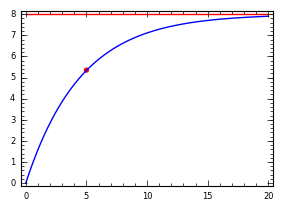

In [116]:
show(plot(ex, (0, 20)) \
+ line([(0, 8), (20, 8)], 
       color='red')\
+ point((5,5.35),color='red', size=15),
figsize=3,frame=True,fontsize=6,axes=False)

In [117]:
R_0= U.diff() + U/(R*C) == U_in*sin(omega*t)/(R*C)
sol = desolve(R_0, U, ivar=t, ics=[0,U_0]);R_0

U(t)/(C*R) + diff(U(t), t) == U_in*sin(omega*t)/(C*R)

In [118]:
sol

(C*R*U_in*omega + (C^2*R^2*omega^2 + 1)*U_0 - (C*R*U_in*omega*cos(omega*t) - U_in*sin(omega*t))*e^(t/(C*R)))*e^(-t/(C*R))/(C^2*R^2*omega^2 + 1)

In [119]:
w0=SR.wild(0); w1=SR.wild(1); w2=SR.wild(2) 
law = w0*sin(w2)+w1*cos(w2)==sqrt(w0^2+w1^2)*sin(w2+sign(w1)*arccos(w1/sqrt(w0^2+w1^2)))
show(law) 

$1*cos($2) + $0*sin($2) == sqrt($1^2 + $0^2)*sin($2 + arccos($1/sqrt($1^2 + $0^2))*sgn($1))

In [120]:
sol2=sol.substitute(law);show(sol2) 

(C*R*U_in*omega - sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2)*e^(t/(C*R))*sin(omega*t + arccos(C*R*U_in*omega/sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2))*sgn(C*R*U_in*omega)) + (C^2*R^2*omega^2 + 1)*U_0)*e^(-t/(C*R))/(C^2*R^2*omega^2 + 1)

In [121]:
ex(t) = sol.substitute({C:1, R:6, U_in:9, omega:6, U_0:0}) 
show(ex) 

t |--> -9/1297*((36*cos(6*t) - sin(6*t))*e^(1/6*t) - 36)*e^(-1/6*t)

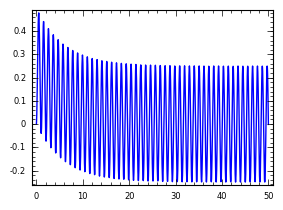

In [122]:
show(plot(ex,0,50,figsize=3,frame=True,fontsize=6,axes=False))

In [123]:
amp = sol2.substitute(w0*sin(w1)+w2==abs(w0)).full_simplify() 
show(amp) 

sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2)/(C^2*R^2*omega^2 + 1)

In [124]:
var('A');assume(A>0); assume(U_in>0) 
solve(amp==A, omega) 

[omega == -sqrt(-(A - sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2))/A)/(C*R), omega == sqrt(-(A - sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2))/A)/(C*R)]

In [125]:
R_A = omega.substitute(_[1]);R_A

sqrt(-(A - sqrt(C^2*R^2*U_in^2*omega^2 + U_in^2))/A)/(C*R)

In [126]:
example(t) = solA.subs({C:1, R:6, U_in:9, U_0:0, A:1/2}).full_simplify() 
show(example) 

t |--> 9/2*(e^(1/6*t)*sin(1/6*t*sqrt(2*sqrt(2916*omega^2 + 81) - 1)) - (cos(1/6*t*sqrt(2*sqrt(2916*omega^2 + 81) - 1))*e^(1/6*t) - 1)*sqrt(2*sqrt(2916*omega^2 + 81) - 1))*e^(-1/6*t)/sqrt(2916*omega^2 + 81)

$i_R=\frac{U_R}{R}$    (1)

$V_L=L\frac{di_L}{dt}$ (2)

$i_C=C\frac{dV_C}{dt}$ (3)

<img src="RC.png">

$i_R$ + $i_C$ = 0

$\frac{V_C-V_in}{R}$ + $C\frac{dV_C}{dt} = 0 $ 

$\frac{v-V_in}{R}$ + $C\frac{dv}{dt} = 0 $ 

In [127]:
var('R, C, L, V_in');t = var('t') ;v = function('v')(t)

In [128]:
eq1 = (v-V_in)/R + C* diff(v,t) == 0 
print 'équation circuit RC:' 
show(eq1) 

équation circuit RC:


C*diff(v(t), t) - (V_in - v(t))/R == 0

In [129]:
sol1(t)=desolve(eq1.lhs(), v, ivar=t) 
eq2 = v == sol1 
print ' Solution :' 
show(eq2(t)) 

 Solution :


v(t) == (V_in*e^(t/(C*R)) + _C)*e^(-t/(C*R))

In [130]:
sol2(t,R,C,V_in) = desolve(eq1.lhs(), v, ivar=t, ics=[0,0]) 
eq3 = v == sol2 
print 'Equations avec conditions initiales :' 
show(eq3(t)) 

Equations avec conditions initiales :


v(t) == (V_in*e^(t/(C*R)) - V_in)*e^(-t/(C*R))

In [131]:
var("R, C, L, V_in") 
t = var('t') 
i = function("i")(t) 
# definiujemy równanie 
print 'Equation RL :' 
eq4 = -L*diff(i,t) + R*i - V_in == 0 
show(eq4) 
# rozwiązujemy równanie 
sol4(t)=desolve(eq4.lhs(), i, ivar=t) 
eq5 = i == sol4 
print 'Solution :' 
show(eq5(t)) 

Equation RL :


R*i(t) - L*diff(i(t), t) - V_in == 0

Solution :


i(t) == (_C + V_in*e^(-R*t/L)/R)*e^(R*t/L)

In [132]:
diff(i,t,2)+diff(i,t)+1/(L*C)==0

1/(C*L) + diff(i(t), t) + diff(i(t), t, t) == 0

In [133]:
sol5(t,R,L,V_in) = desolve(eq4.lhs(),i, ivar=t,ics=[0,0]) 
eq6 = i == sol5 
print 'Solution RL avec CI :' 
show(eq6(t)) 


Solution RL avec CI :


i(t) == -(V_in*e^(R*t/L) - V_in)/R

In [134]:
# V_in=0; R=2; L=10; C=7; dt=0.01; i0 =0; vc0=10; N=5000

In [135]:
var("vr0,R,i0,vl0,V_in,vc0,L,C")
vr0=R*i0
vl0 = V_in - vc0 - vr0
i_diff0= vl0/L
vc_diff0=i0/C

In [136]:
vr0

R*i0

In [137]:
vl0

-R*i0 + V_in - vc0

In [138]:
vl0

-R*i0 + V_in - vc0

In [139]:
i_diff0

-(R*i0 - V_in + vc0)/L

In [140]:
vc_diff0

i0/C